### Capstone 2- Bengali Grapheme Classification Project

This notebook visualizes the data features present in the Bengali Grapheme dataset.

In [1]:
#**********************************************************
#standard imports
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from collections import defaultdict
from PIL import Image,ImageDraw,ImageFont

Next, we read the project csv files which define the labels

In [2]:
filenames = ['train','test','class_map','class_map_corrected','train_multi_diacritics','sample_submission']
df_dict = defaultdict()
for file in filenames:
    df_dict[file]=pd.read_csv('./data/{}.csv'.format(file))

In [3]:
# taking a look at the class map
df_dict['class_map_corrected'].head()

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই


In [4]:
# taking a look at the class map
df_dict['class_map_corrected'].tail()

,component_type,label,component
182,consonant_diacritic,3,র্য
183,consonant_diacritic,4,্য
184,consonant_diacritic,5,্র
185,consonant_diacritic,6,্র্য
186,consonant_diacritic,7,র্্র


Let's isolate the most frequent roots, vowels and consonants

In [5]:
top_5_grapheme_roots = df_dict['train'].grapheme_root.value_counts(ascending=False)[:5].index
top_5_grapheme_roots

Int64Index([72, 64, 13, 107, 23], dtype='int64')

In [6]:
top_5_vowel_diacritics = df_dict['train'].vowel_diacritic.value_counts(ascending=False)[1:6].index
top_5_vowel_diacritics

Int64Index([1, 7, 2, 4, 3], dtype='int64')

In [7]:
top_5_consonant_diacritics = df_dict['train'].consonant_diacritic.value_counts(ascending=False)[1:6].index
top_5_consonant_diacritics

Int64Index([2, 5, 4, 1, 6], dtype='int64')

In [8]:
# defining a function to connect the index values to a character
def component_filter(df,component):
    filt = df.component_type==component
    return df[filt]

In [9]:
grapheme_roots_df = component_filter(df_dict['class_map_corrected'],'grapheme_root')
vowel_diacritics_df = component_filter(df_dict['class_map_corrected'],'vowel_diacritic')
consonant_diacritics_df = component_filter(df_dict['class_map_corrected'],'consonant_diacritic')

In [10]:
top_5_grapheme_roots_char = grapheme_roots_df.iloc[top_5_grapheme_roots,2].values
top_5_vowel_diacritics_char = vowel_diacritics_df.iloc[top_5_vowel_diacritics,2].values
top_5_consonant_diacritics_char = consonant_diacritics_df.iloc[top_5_consonant_diacritics,2].values

In [11]:
top_5_grapheme_roots_char

array(['দ', 'ত', 'ক', 'ব', 'গ'], dtype=object)

In [12]:
top_5_vowel_diacritics_char

array(['া', 'ে', 'ি', 'ু', 'ী'], dtype=object)

In [13]:
top_5_consonant_diacritics_char

array(['র্', '্র', '্য', 'ঁ', '্র্য'], dtype=object)

Let's define a function to draw the characters using pillow

In [14]:
def image_from_char(char):
    image = Image.new('RGB', (WIDTH, HEIGHT))
    draw = ImageDraw.Draw(image)
    myfont = ImageFont.truetype('./Kalpurush.ttf', 120)
    w, h = draw.textsize(char, font=myfont)
    draw.text(((WIDTH - w) / 2,(HEIGHT - h) / 3), char, font=myfont)
    return image

Let's visualize the most frequent roots

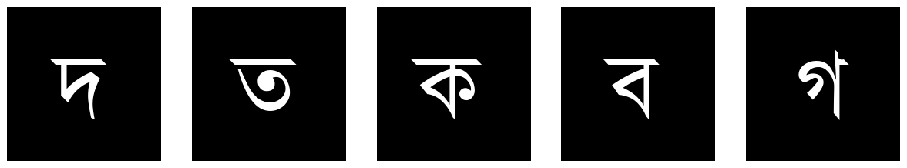

In [15]:
fig, ax = plt.subplots(1,5,figsize=(16,8))

HEIGHT = 200
WIDTH = 200
for i in range(5):
    ax[i].imshow(image_from_char(top_5_grapheme_roots_char[i]),cmap='Greys')
    ax[i].axis('off')

Let's visualize the most frequent vowel diacritics

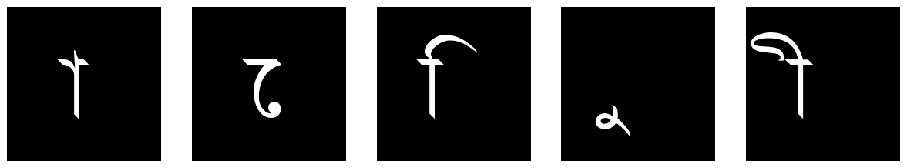

In [16]:
fig, ax = plt.subplots(1,5,figsize=(16,8))

for i in range(5):
    ax[i].imshow(image_from_char(top_5_vowel_diacritics_char[i]),cmap='Greys')
    ax[i].axis('off')

Let's visualize the most frequent consonant diacritics

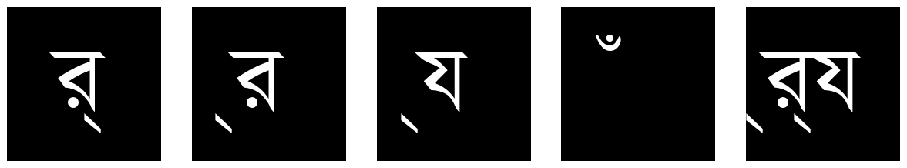

In [17]:
fig, ax = plt.subplots(1,5,figsize=(16,8))

for i in range(5):
    ax[i].imshow(image_from_char(top_5_consonant_diacritics_char[i]),cmap='Greys')
    ax[i].axis('off')

The above visualizations are based on the Kalpurush font. Obviously hand-written characters will not look this neat. So let's visualize a hand-written character and break down it's root, vowel and consonant diacritics

In [18]:
# loading a parquet file
train_images_set1_df = pd.read_parquet('./data/train_image_data_3.parquet')
train_images_set1_df.head(10)

,image_id,0,1,2,3,4,5,6,7,8,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,Train_150630,246,245,244,244,245,247,246,244,247,...,252,252,251,251,251,251,251,252,253,252
1,Train_150631,213,241,247,247,246,247,246,244,247,...,193,198,200,202,200,196,194,192,175,117
2,Train_150632,253,253,252,252,251,252,253,253,253,...,253,253,253,253,253,253,253,253,253,253
3,Train_150633,252,252,252,252,252,252,252,252,252,...,255,255,255,255,255,255,255,255,255,255
4,Train_150634,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
5,Train_150635,255,255,255,255,255,255,255,255,255,...,255,255,255,254,254,254,254,254,254,253
6,Train_150636,251,251,252,252,252,252,251,252,252,...,253,253,253,253,253,253,253,253,250,248
7,Train_150637,239,241,243,235,239,243,240,241,248,...,253,254,254,254,254,253,253,253,253,253
8,Train_150638,253,253,253,253,253,253,253,252,251,...,253,253,252,252,251,251,253,254,254,254
9,Train_150639,252,250,246,241,238,238,242,246,249,...,237,238,244,243,243,243,243,243,244,245


In [19]:
filt=train_images_set1_df.image_id=='Train_200835'
random_sample=train_images_set1_df[filt].iloc[:,1:].values

In [20]:
df_dict['train'].iloc[200835,:].values

array(['Train_200835', 22, 7, 2, 'র্খে'], dtype=object)

In [21]:
HEIGHT = 200
WIDTH = 236

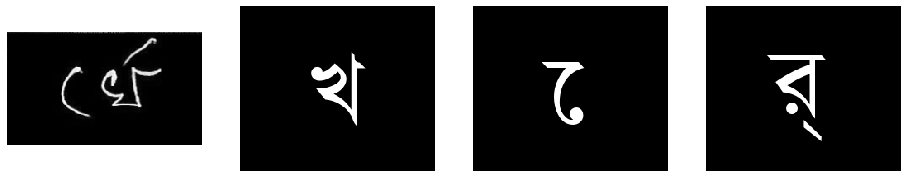

In [27]:
fig,[ax1,ax2,ax3,ax4] = plt.subplots(nrows=1,ncols=4,figsize=(16,8))
ax1.imshow(random_sample.reshape(137,236).astype(np.float32),cmap='Greys');
ax1.axis('off');
ax2.imshow(image_from_char(grapheme_roots_df.iloc[22,2]),cmap='Greys');
ax2.axis('off');
ax3.imshow(image_from_char(vowel_diacritics_df.iloc[7,2]),cmap='Greys');
ax3.axis('off');
ax4.imshow(image_from_char(consonant_diacritics_df.iloc[2,2]),cmap='Greys');
ax4.axis('off');

For this character, the happens to be both a vowel and consonant diacritic. The root and vowel diacritic are distinguishable. However, the consonant diacritic is not from the hand-written character. This is a characteristic of Indic languages where diacritics are transformed from their base shape when combined with grapheme roots in many cases. 